# Oficina 1: Modelo de previsão de temperaturas


1. ## Planejamento

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras import Input
from sklearn.metrics import mean_squared_error

2025-02-14 22:05:10.266001: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-14 22:05:10.484755: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-14 22:05:10.669317: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739570710.975208     576 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739570711.071549     576 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-14 22:05:11.730499: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

2. ##  Carregamento e Preparação dos Dados

In [6]:
np.random.seed(0)
data = np.sin(np.linspace(0, 20, 100)) * 10 + 25 + np.random.normal(0, 1, 100)


   Temperatura
0    26.764052
1    27.406646
2    29.910104
3    32.937234
4    34.097184


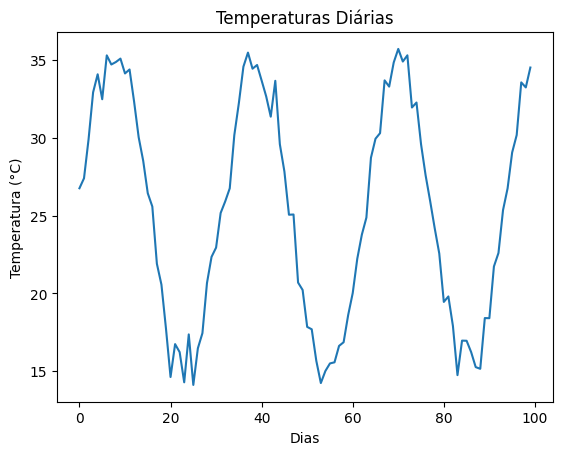

In [7]:
# Gerando dados fictícios de temperaturas diárias para os últimos 100 dias

np.random.seed(0)
data = np.sin(np.linspace(0, 20, 100)) * 10 + 25 + np.random.normal(0, 1, 100)

# Transformando os dados em um DataFrame para facilitar a manipulação
df = pd.DataFrame(data, columns=["Temperatura"])  # Fixed quotes

# Exibindo as primeiras 5 linhas do DataFrame para visualizar os dados
print(df.head())

# Visualizando os dados de temperatura para ter uma ideia das tendências
plt.plot(df)
plt.title("Temperaturas Diárias")  # Fixed quotes
plt.xlabel("Dias")  # Fixed quotes
plt.ylabel("Temperatura (°C)")  # Fixed quotes
plt.show()

In [8]:
# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Criando sequências de entrada e saída
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

# Dividindo os dados em treinamento e teste
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Redimensionando os dados para o formato esperado pela LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [9]:
# Criando o modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20


2025-02-14 22:05:15.470662: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3142
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2080
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1354
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1551
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1408
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1302
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1119
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1141
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1084
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1022
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1029
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0910
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0876
Epoch 14/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0885
Epoch 15/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0801
Epoch 16/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


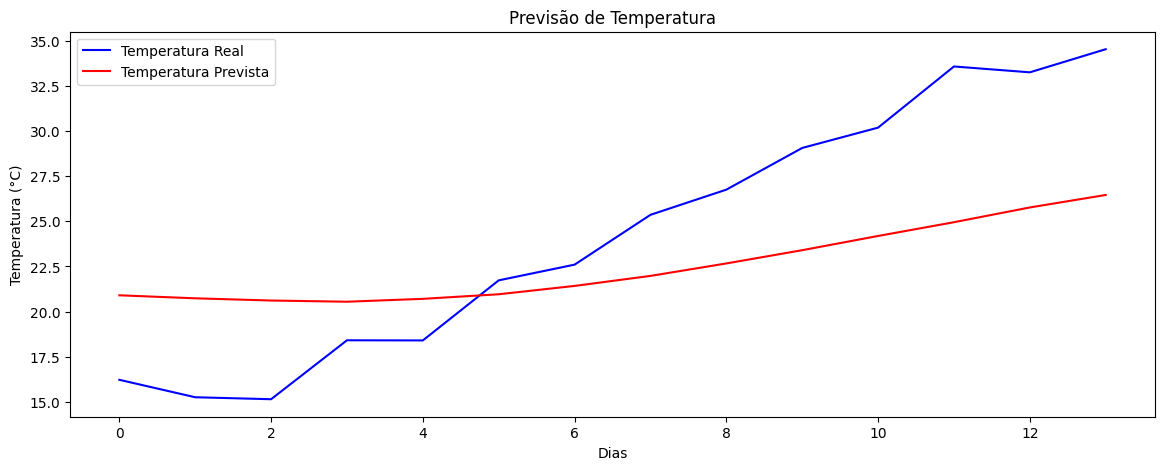

In [12]:
# Fazendo previsões
predicted_temperatures = model.predict(X_test)
predicted_temperatures = scaler.inverse_transform(predicted_temperatures)

# Invertendo a transformação dos dados de teste
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualizando os resultados
plt.figure(figsize=(14, 5))
plt.plot(y_test_actual, color='blue', label='Temperatura Real')
plt.plot(predicted_temperatures, color='red', label='Temperatura Prevista')
plt.title('Previsão de Temperatura')
plt.xlabel('Dias')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()
